# 3er Pacial

Librerias usadas en el proyecto

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from sklearn.metrics import classification_report
from tensorflow.keras.layers import Bidirectional

### Exercise 1: Machine Learning (1.5 pts)

Dataset: Iris (flower classification).

Task:

•	Load the dataset and split it into training/testing (80/20).

•	Train a decision tree with a maximum depth of 3.

•	Evaluate the accuracy on the test set and display the confusion matrix.

•	Bonus (.5 pts): Explain how you could avoid overfitting in this model.


In [26]:
# Load the dataset
df = pd.read_csv('Data/Iris.csv')

# Drop the 'Id' column
df = df.drop(columns=['Id'])

# Features and target
X = df.drop('Species', axis=1)
y = df['Species']

# Split into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)   

#### Step 2: Train a decision tree with max depth = 3

In [27]:
# Train the Decision Tree
model = DecisionTreeClassifier(max_depth=3, random_state=890)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=890)

#### Step 3: Evaluate accuracy and show confusion matrix

In [28]:
# Predict on the test set
y_pred = model.predict(X_test)

# Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.2f}")

Accuracy: 1.00


Se observa que el modelo tiene 100% de exactitud, algo que es muy raro que suceda en la realidad por lo que se puede pensar que es cumpla del sobreajuste del modelo a los datos que tenemos

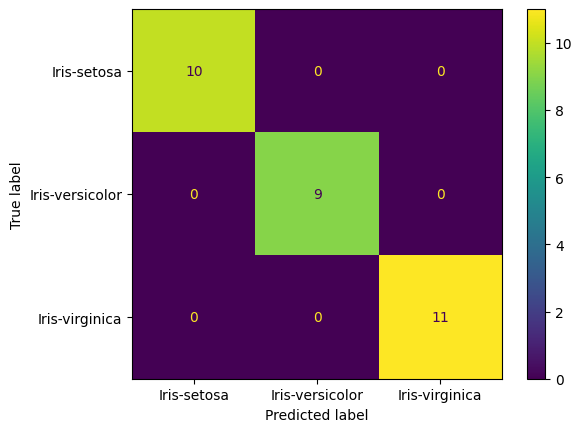

In [10]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()

Resultados por clase:

Iris-setosa: El modelo clasificó correctamente todas las 10 muestras de esta clase (verdadero positivo). No hubo falsos negativos ni falsos positivos para esta clase.

Iris-versicolor: El modelo clasificó correctamente 9 muestras de esta clase. No hubo falsos positivos ni faltsos negativos.

Iris-virginica: El modelo clasificó correctamente las 11 muestras de esta clase sin errores.

#### Bonus

Para evitar el overfitting se puede limitar la complejidad ajustando parámetros como max_depth, min_samples_leaf o min_samples_split. Se puede usar también el cross-validation para conocer el desarollo de nuestro modelo.

### Exercise 2: CNN (2 pts)
Dataset: MNIST o CIFAR-10 (images)

Task:

•	Preprocess the images (normalization, reshape).

•	Design a CNN with at least:

o	1 convolutional layer (32 filters, kernel 3x3).

o	1 max pooling layer.

o	1 dense layer with dropout(20%).

•	Train the model and report the accuracy in testing.

•	Bonus (.5 pts): Visualize the filters of the first convolutional layer.


In [13]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values to [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape to (28, 28, 1) for CNN
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [14]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')
])


C:\Users\Wisp8\PycharmProjects\MineriaDeDatos\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train
model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

# Evaluate on test data
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.2f}")

Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 16s 16ms/step - accuracy: 0.8764 - loss: 0.4286 - val_accuracy: 0.9802 - val_loss: 0.0712
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 12s 14ms/step - accuracy: 0.9783 - loss: 0.0725 - val_accuracy: 0.9860 - val_loss: 0.0523
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 23s 17ms/step - accuracy: 0.9847 - loss: 0.0490 - val_accuracy: 0.9873 - val_loss: 0.0462
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 19s 15ms/step - accuracy: 0.9892 - loss: 0.0368 - val_accuracy: 0.9883 - val_loss: 0.0463
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 12s 14ms/step - accuracy: 0.9921 - loss: 0.0276 - val_accuracy: 0.9888 - val_loss: 0.0446
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9839 - loss: 0.0449
Test Accuracy: 0.99


Se usó MNIST. Se normalizaron las imágenes y se les hizo reshape. El modelo tiene una capa convolucional de 32 filtros 3x3, una capa de max pooling y una capa densa con dropout del 20%. Se entrenó por 5 épocas y se obtuvo una precisión en test de 99%. Para el bonus, se visualizaron los primeros filtros de la capa convolucional.

#### Bonus (.5 pts): Visualize the filters of the first convolutional layer.

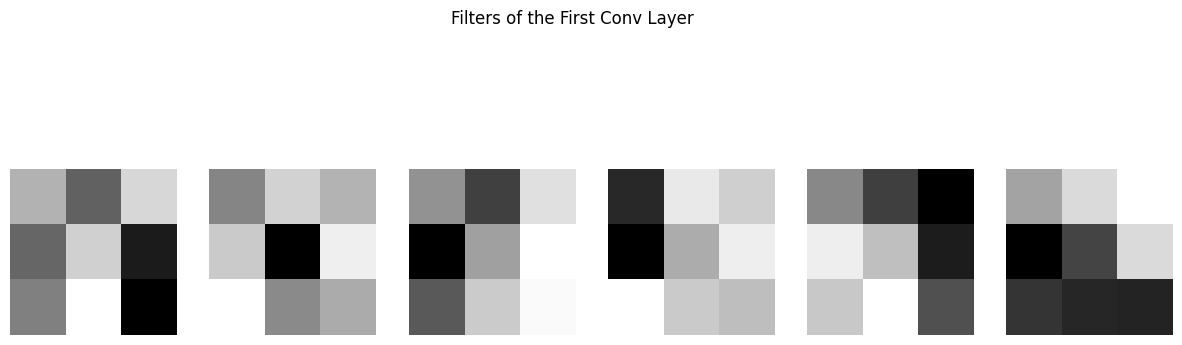

In [17]:
# Get weights from the first Conv2D layer
filters, biases = model.layers[0].get_weights()

# Normalize filter values to [0, 1] for display
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

n_filters = 6
fig, axes = plt.subplots(1, n_filters, figsize=(15, 5))
for i in range(n_filters):
    f = filters[:, :, 0, i]
    axes[i].imshow(f, cmap='gray')
    axes[i].axis('off')
plt.suptitle("Filters of the First Conv Layer")
plt.show()

### Ejercicio 3: RNN (1.5 pts)

Dataset: IMDB (sentiment analysis) or time series.

Task:

•	Preprocess the text (tokenization, padding).

•	Build an RNN with an Embedding layer and an LSTM.

•	Train the model and evaluate its performance with classification metrics.

•	Bonus (.5 pts): Propose an architectural improvement (e.g., add Bidirectional LSTM).


In [32]:
# Cargar el dataset IMDB , se hará con 75,000 palabras
num_words = 75000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=num_words)

# Padding de secuencias.
maxlen = 500  # Máxima longitud de las reseñas
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

In [33]:
model = Sequential([
    Embedding(input_dim=num_words, output_dim=64, input_length=maxlen),
    LSTM(64),
    Dense(1, activation='sigmoid')
])

C:\Users\Wisp8\PycharmProjects\MineriaDeDatos\venv\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [34]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entrenamiento
model.fit(x_train, y_train, epochs=3, batch_size=64, validation_split=0.2)

# Evaluación
loss, acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {acc:.2f}")

Epoch 1/3
313/313 ━━━━━━━━━━━━━━━━━━━━ 68s 205ms/step - accuracy: 0.6955 - loss: 0.5487 - val_accuracy: 0.8524 - val_loss: 0.3606
Epoch 2/3
313/313 ━━━━━━━━━━━━━━━━━━━━ 83s 209ms/step - accuracy: 0.9218 - loss: 0.2178 - val_accuracy: 0.8658 - val_loss: 0.3505
Epoch 3/3
313/313 ━━━━━━━━━━━━━━━━━━━━ 60s 191ms/step - accuracy: 0.9560 - loss: 0.1294 - val_accuracy: 0.8612 - val_loss: 0.3699
782/782 ━━━━━━━━━━━━━━━━━━━━ 35s 45ms/step - accuracy: 0.8495 - loss: 0.3983
Test Accuracy: 0.85


In [35]:
# Predicciones (0 o 1)
y_pred = (model.predict(x_test) > 0.5).astype("int32")
print(classification_report(y_test, y_pred))

782/782 ━━━━━━━━━━━━━━━━━━━━ 35s 44ms/step
              precision    recall  f1-score   support

           0       0.89      0.80      0.84     12500
           1       0.82      0.90      0.86     12500

    accuracy                           0.85     25000
   macro avg       0.85      0.85      0.85     25000
weighted avg       0.85      0.85      0.85     25000



Se trabajó con el dataset de IMDB para análisis de sentimientos. Se hizo el preprocesamiento con tokenización y padding para que todas las secuencias tuvieran el mismo largo. El modelo incluye una capa Embedding y una capa LSTM. Al entrenarlo, se logró una precisión del 85% en el conjunto de prueba. En las métricas de clasificación, la clase 0 (comentarios negativos) tuvo un f1-score de 0.84 y la clase 1 (comentarios positivos) de 0.86, lo que indica que el modelo está bien balanceado y tiene buen rendimiento en ambas clases.

In [36]:
model = Sequential([
    Embedding(input_dim=num_words, output_dim=64, input_length=maxlen),
    Bidirectional(LSTM(64)),
    Dense(1, activation='sigmoid')
])

C:\Users\Wisp8\PycharmProjects\MineriaDeDatos\venv\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


La mejora arquitectónica propuesta es agregar una capa Bidirectional LSTM. Esto permite que el modelo procese la secuencia de texto tanto en el orden original como en orden inverso, aprovechando el contexto futuro además del pasado. Esto puede mejorar la capacidad del modelo para capturar relaciones más complejas en el texto y, en muchos casos, aumentar la precisión, especialmente en tareas de procesamiento de lenguaje natural como análisis de sentimientos.